In [23]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [8]:
df = pd.read_csv('WineQT.csv')

## <center> Exploring and Cleaning DataSet


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [27]:
# Droping Id
df.drop("Id",axis = 1, inplace = True)

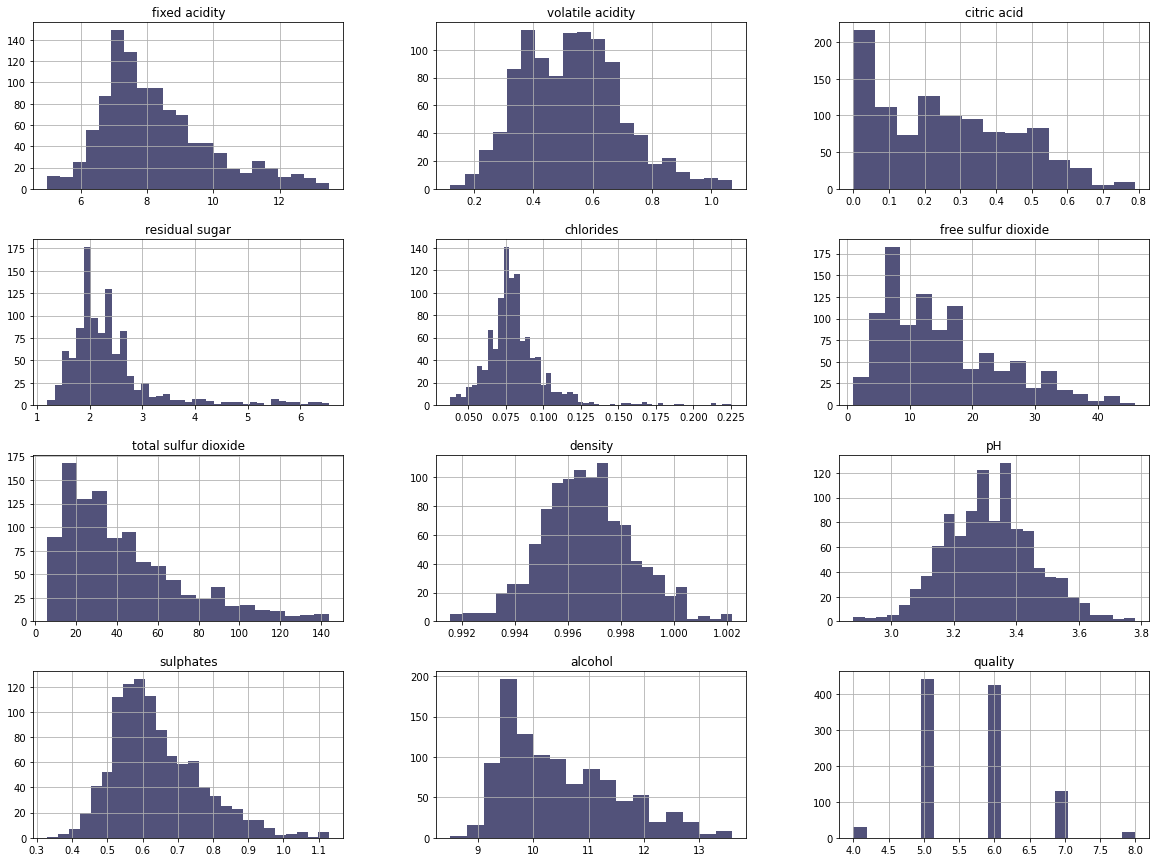

In [28]:
df.hist(figsize=(20,15),bins='auto', color='#52527a')
plt.show()

There is not much outliers within the data along all columns thereore there is no need of dropping them from the dataset for now. We can see the right skewness along the data set - it is very common in our data. For now will focus on finding those outliers using the plot box and seeing how they differantiate among all quality levels of wine.

## Handling Outliers using Z-score 

In [29]:
#Calculate z-score
z = np.abs(stats.zscore(df))

threshold = 3

#Keep rows with Z-score less than 3
df = df[(z < threshold).all(axis=1)]

## Checking the distribution after handling outliers 

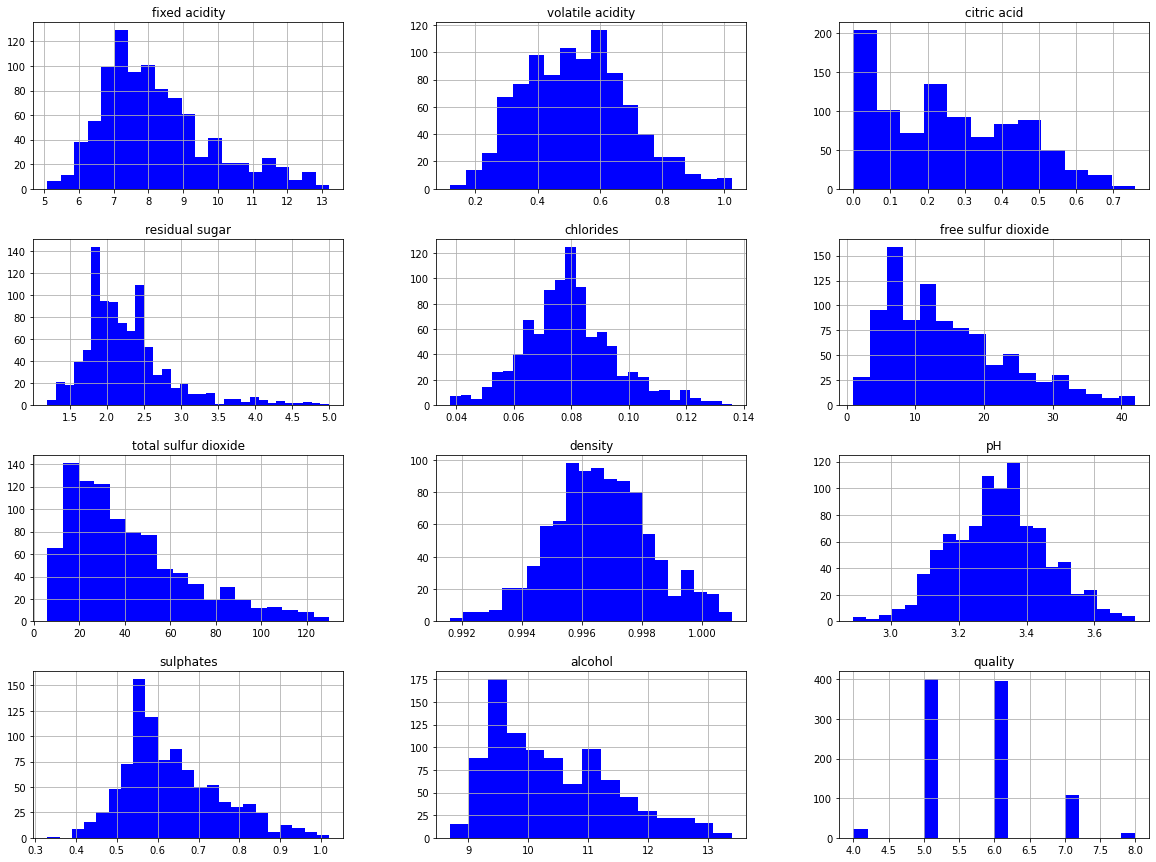

In [45]:
df.hist(figsize=(20,15),bins='auto', color='#0000FF', grid=None)
plt.show()

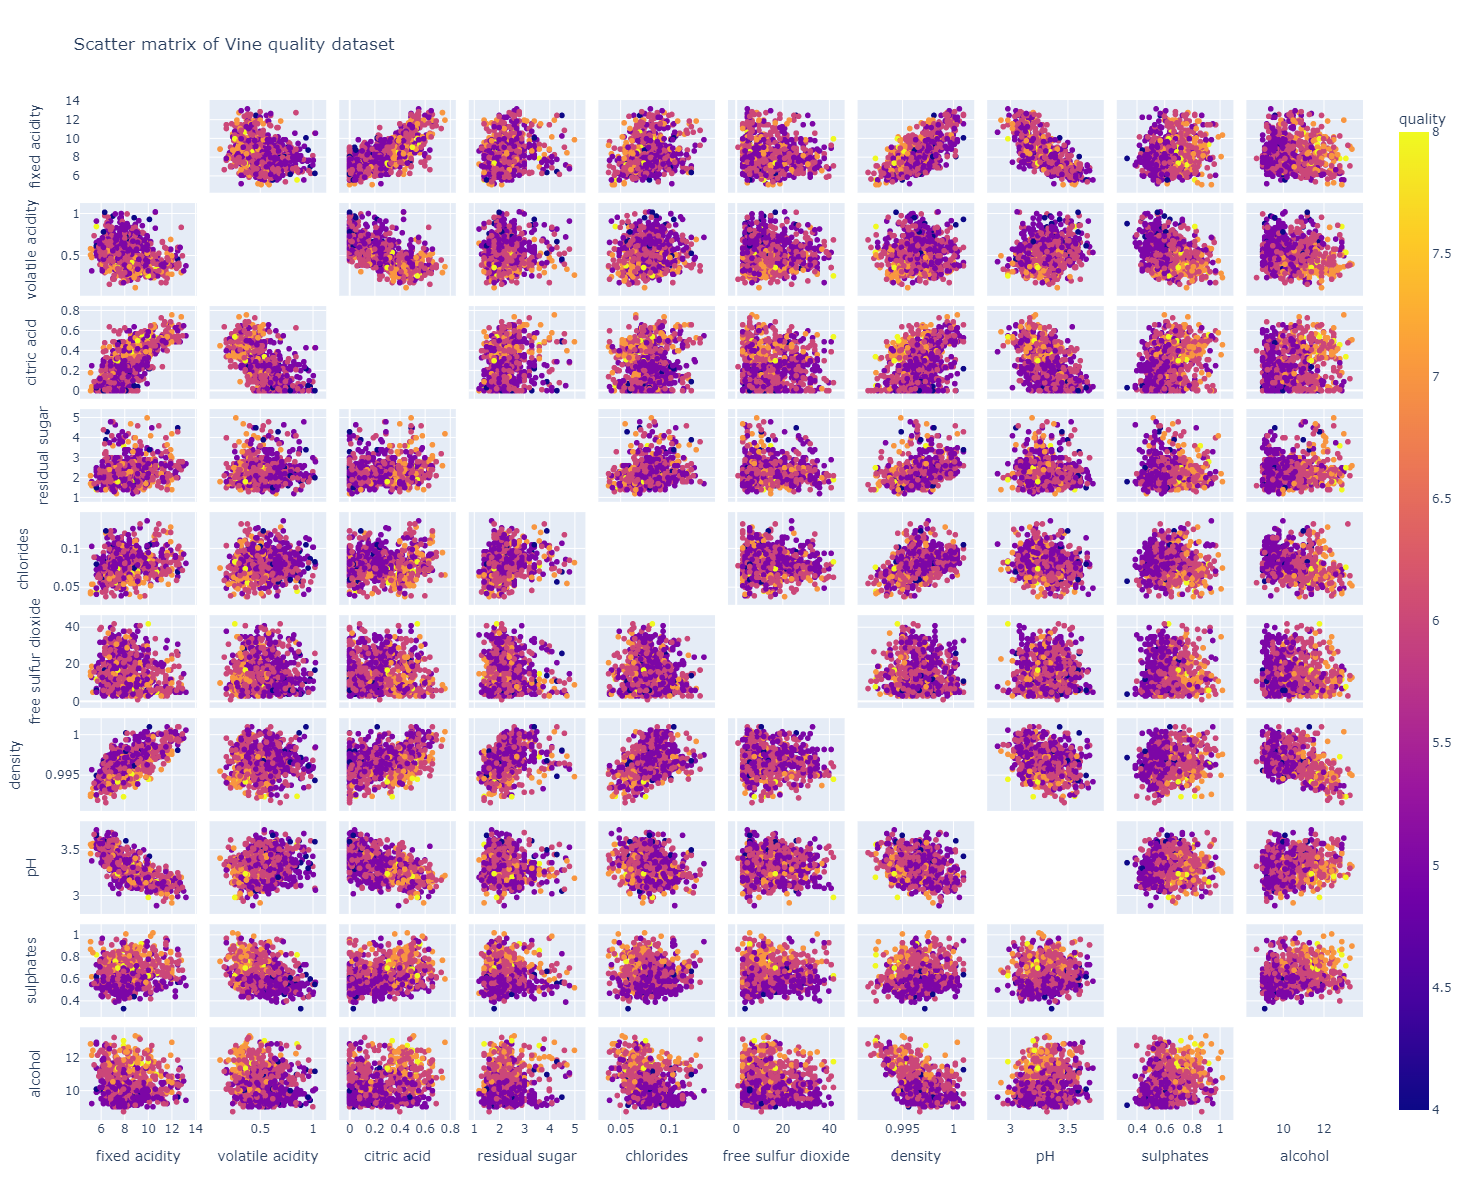

In [31]:
fig = px.scatter_matrix(df,
    dimensions=["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","density","pH","sulphates","alcohol"],
    color="quality",
title = "Scatter matrix of Vine quality dataset", labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.update_layout(width=1400,
    height=1200)
fig.show()

## Skewness of the dataset 

Normal distribution skewness is zero, any symmetric data should have a skewness near zero.
Any value above or below 1 shows the data is skewed in one way or another (left skewed or right skewed)

Text(0.5, 0, 'Skewness')

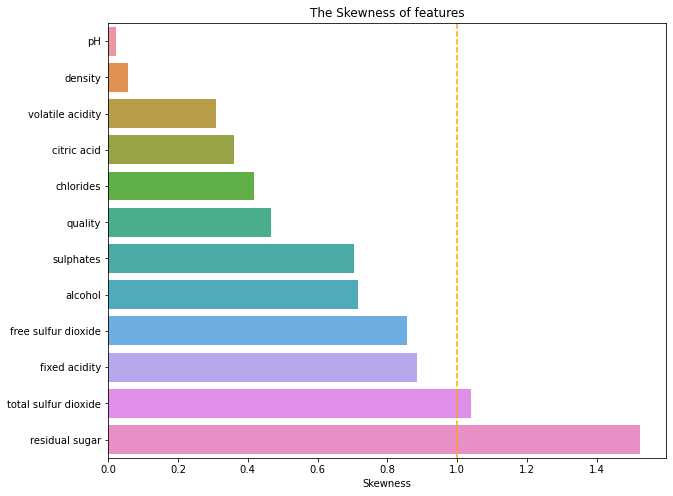

In [35]:
plt.figure(figsize=(10,8))
skewness=df.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, color='orange', linestyle='--')
plt.xlabel('Skewness')

### Highly Skewed Values are:
 - Residual sugar
 - total sulfur dioxide

 # <center> Checking the correlation 

Text(0.5, 1.0, 'Correlation')

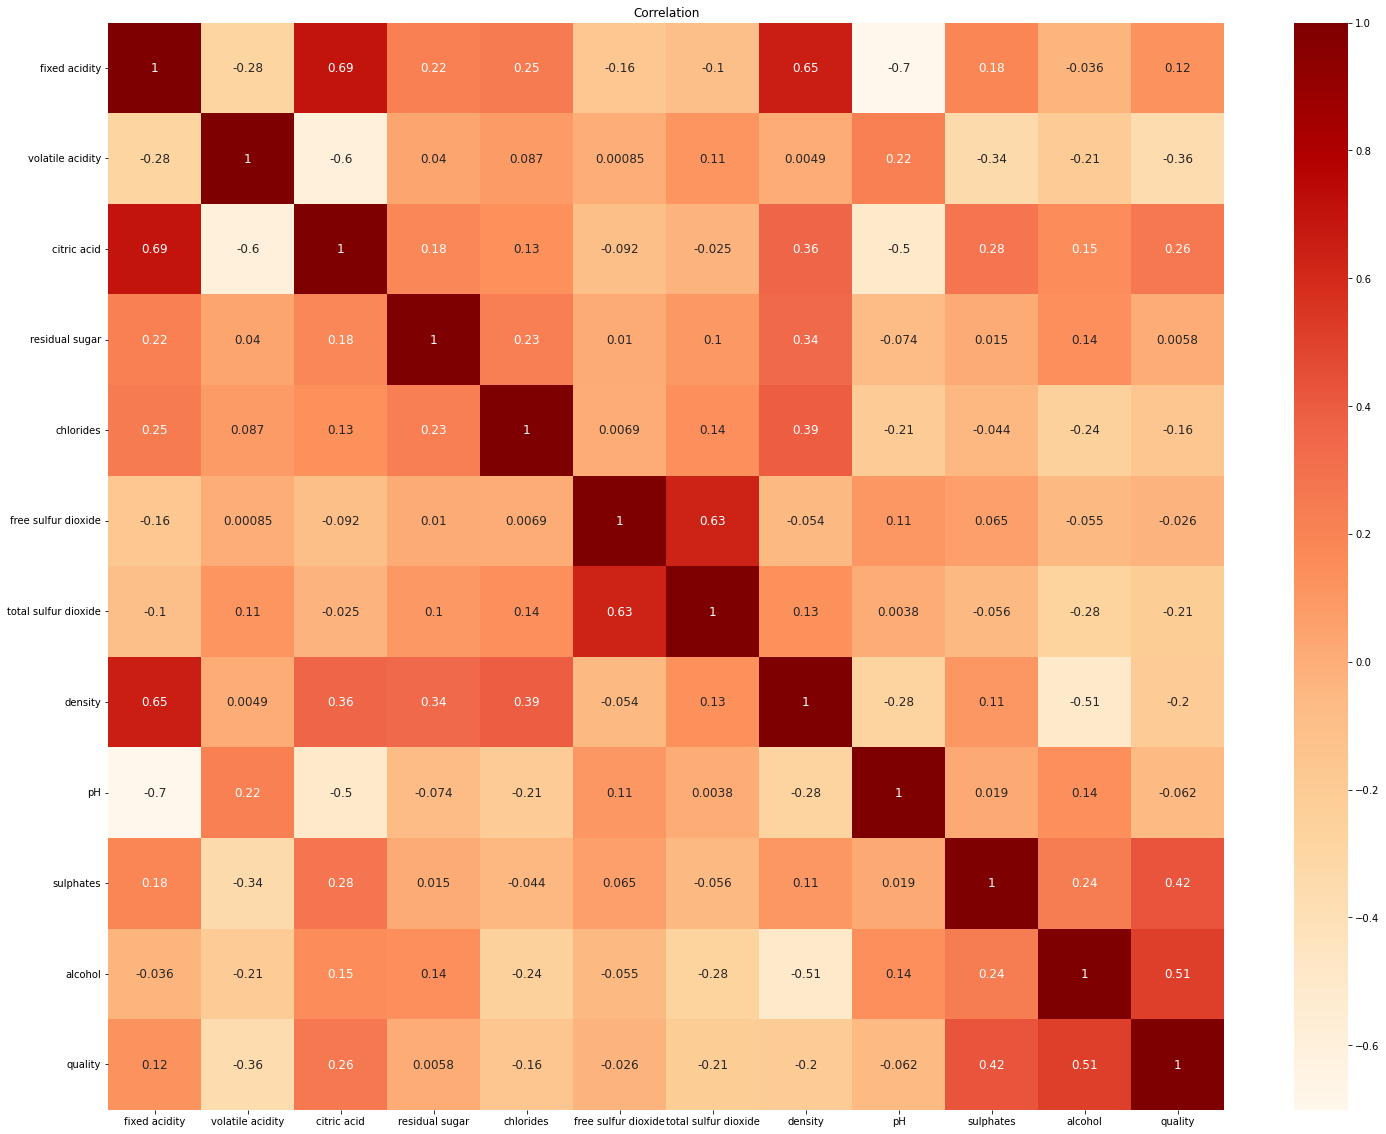

In [41]:
corr = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap="OrRd", annot_kws={"fontsize":12})
plt.title("Correlation")